In [16]:
!nvidia-smi

Sat Aug  3 15:04:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**Clone the yolov8 repository**

In [2]:
!git clone https://github.com/MuhammadMoinFaisal/YOLOv8-DeepSORT-Object-Tracking.git

Cloning into 'YOLOv8-DeepSORT-Object-Tracking'...
remote: Enumerating objects: 403, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 403 (delta 21), reused 19 (delta 19), pack-reused 370
Receiving objects: 100% (403/403), 77.99 MiB | 37.94 MiB/s, done.
Resolving deltas: 100% (206/206), done.


In [3]:
!pwd

/content


**Go to the cloned folder**

In [4]:
%cd /content/YOLOv8-DeepSORT-Object-Tracking

/content/YOLOv8-DeepSORT-Object-Tracking


**Install the dependencies**

In [5]:
!pip install -e '.[dev]'

Obtaining file:///content/YOLOv8-DeepSORT-Object-Tracking
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_c

**Go to detect folder**

In [7]:
%cd /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect

/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect


**Download Deepsot directory for tracking**

In [8]:
!gdown "https://drive.google.com/uc?id=11ZSZcG-bcbueXZC3rN08CM0qqX3eiHxf&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=11ZSZcG-bcbueXZC3rN08CM0qqX3eiHxf&confirm=t
To: /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/deep_sort_pytorch.zip
100% 43.1M/43.1M [00:00<00:00, 87.1MB/s]


**unzip the directory**

In [9]:
!unzip 'deep_sort_pytorch.zip'

Archive:  deep_sort_pytorch.zip
  inflating: deep_sort_pytorch/.gitignore  
   creating: deep_sort_pytorch/configs/
  inflating: deep_sort_pytorch/configs/deep_sort.yaml  
   creating: deep_sort_pytorch/deep_sort/
  inflating: deep_sort_pytorch/deep_sort/__init__.py  
   creating: deep_sort_pytorch/deep_sort/__pycache__/
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-310.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-37.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-38.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-310.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-37.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-38.pyc  
   creating: deep_sort_pytorch/deep_sort/deep/
 extracting: deep_sort_pytorch/deep_sort/deep/__init__.py  
   creating: deep_sort_pytorch/deep_sort/deep/__pycache__/
  inflating: deep_sort_pytorch/d

In [17]:
HOME = '/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect'

In [18]:
%cd {HOME}

/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect


In [19]:
%pwd

'/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect'

**Start training on data for detection and tracking**

In [21]:
!python train.py model=yolov8l.pt data=/content/drive/MyDrive/detection_tracking/comp_project/data.yaml epochs=50 imgsz=640

yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/drive/MyDrive/detection_tracking/comp_project/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, w

In [27]:
!ls /content/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train5

args.yaml					    R_curve.png        train_batch41.jpg
confusion_matrix.png				    results.csv        train_batch42.jpg
events.out.tfevents.1722697623.01775b792fbb.4703.0  results.png        val_batch0_labels.jpg
F1_curve.png					    train_batch0.jpg   val_batch0_pred.jpg
P_curve.png					    train_batch1.jpg   weights
PR_curve.png					    train_batch2.jpg
predictions.json				    train_batch40.jpg


In [28]:
from IPython.display import Image

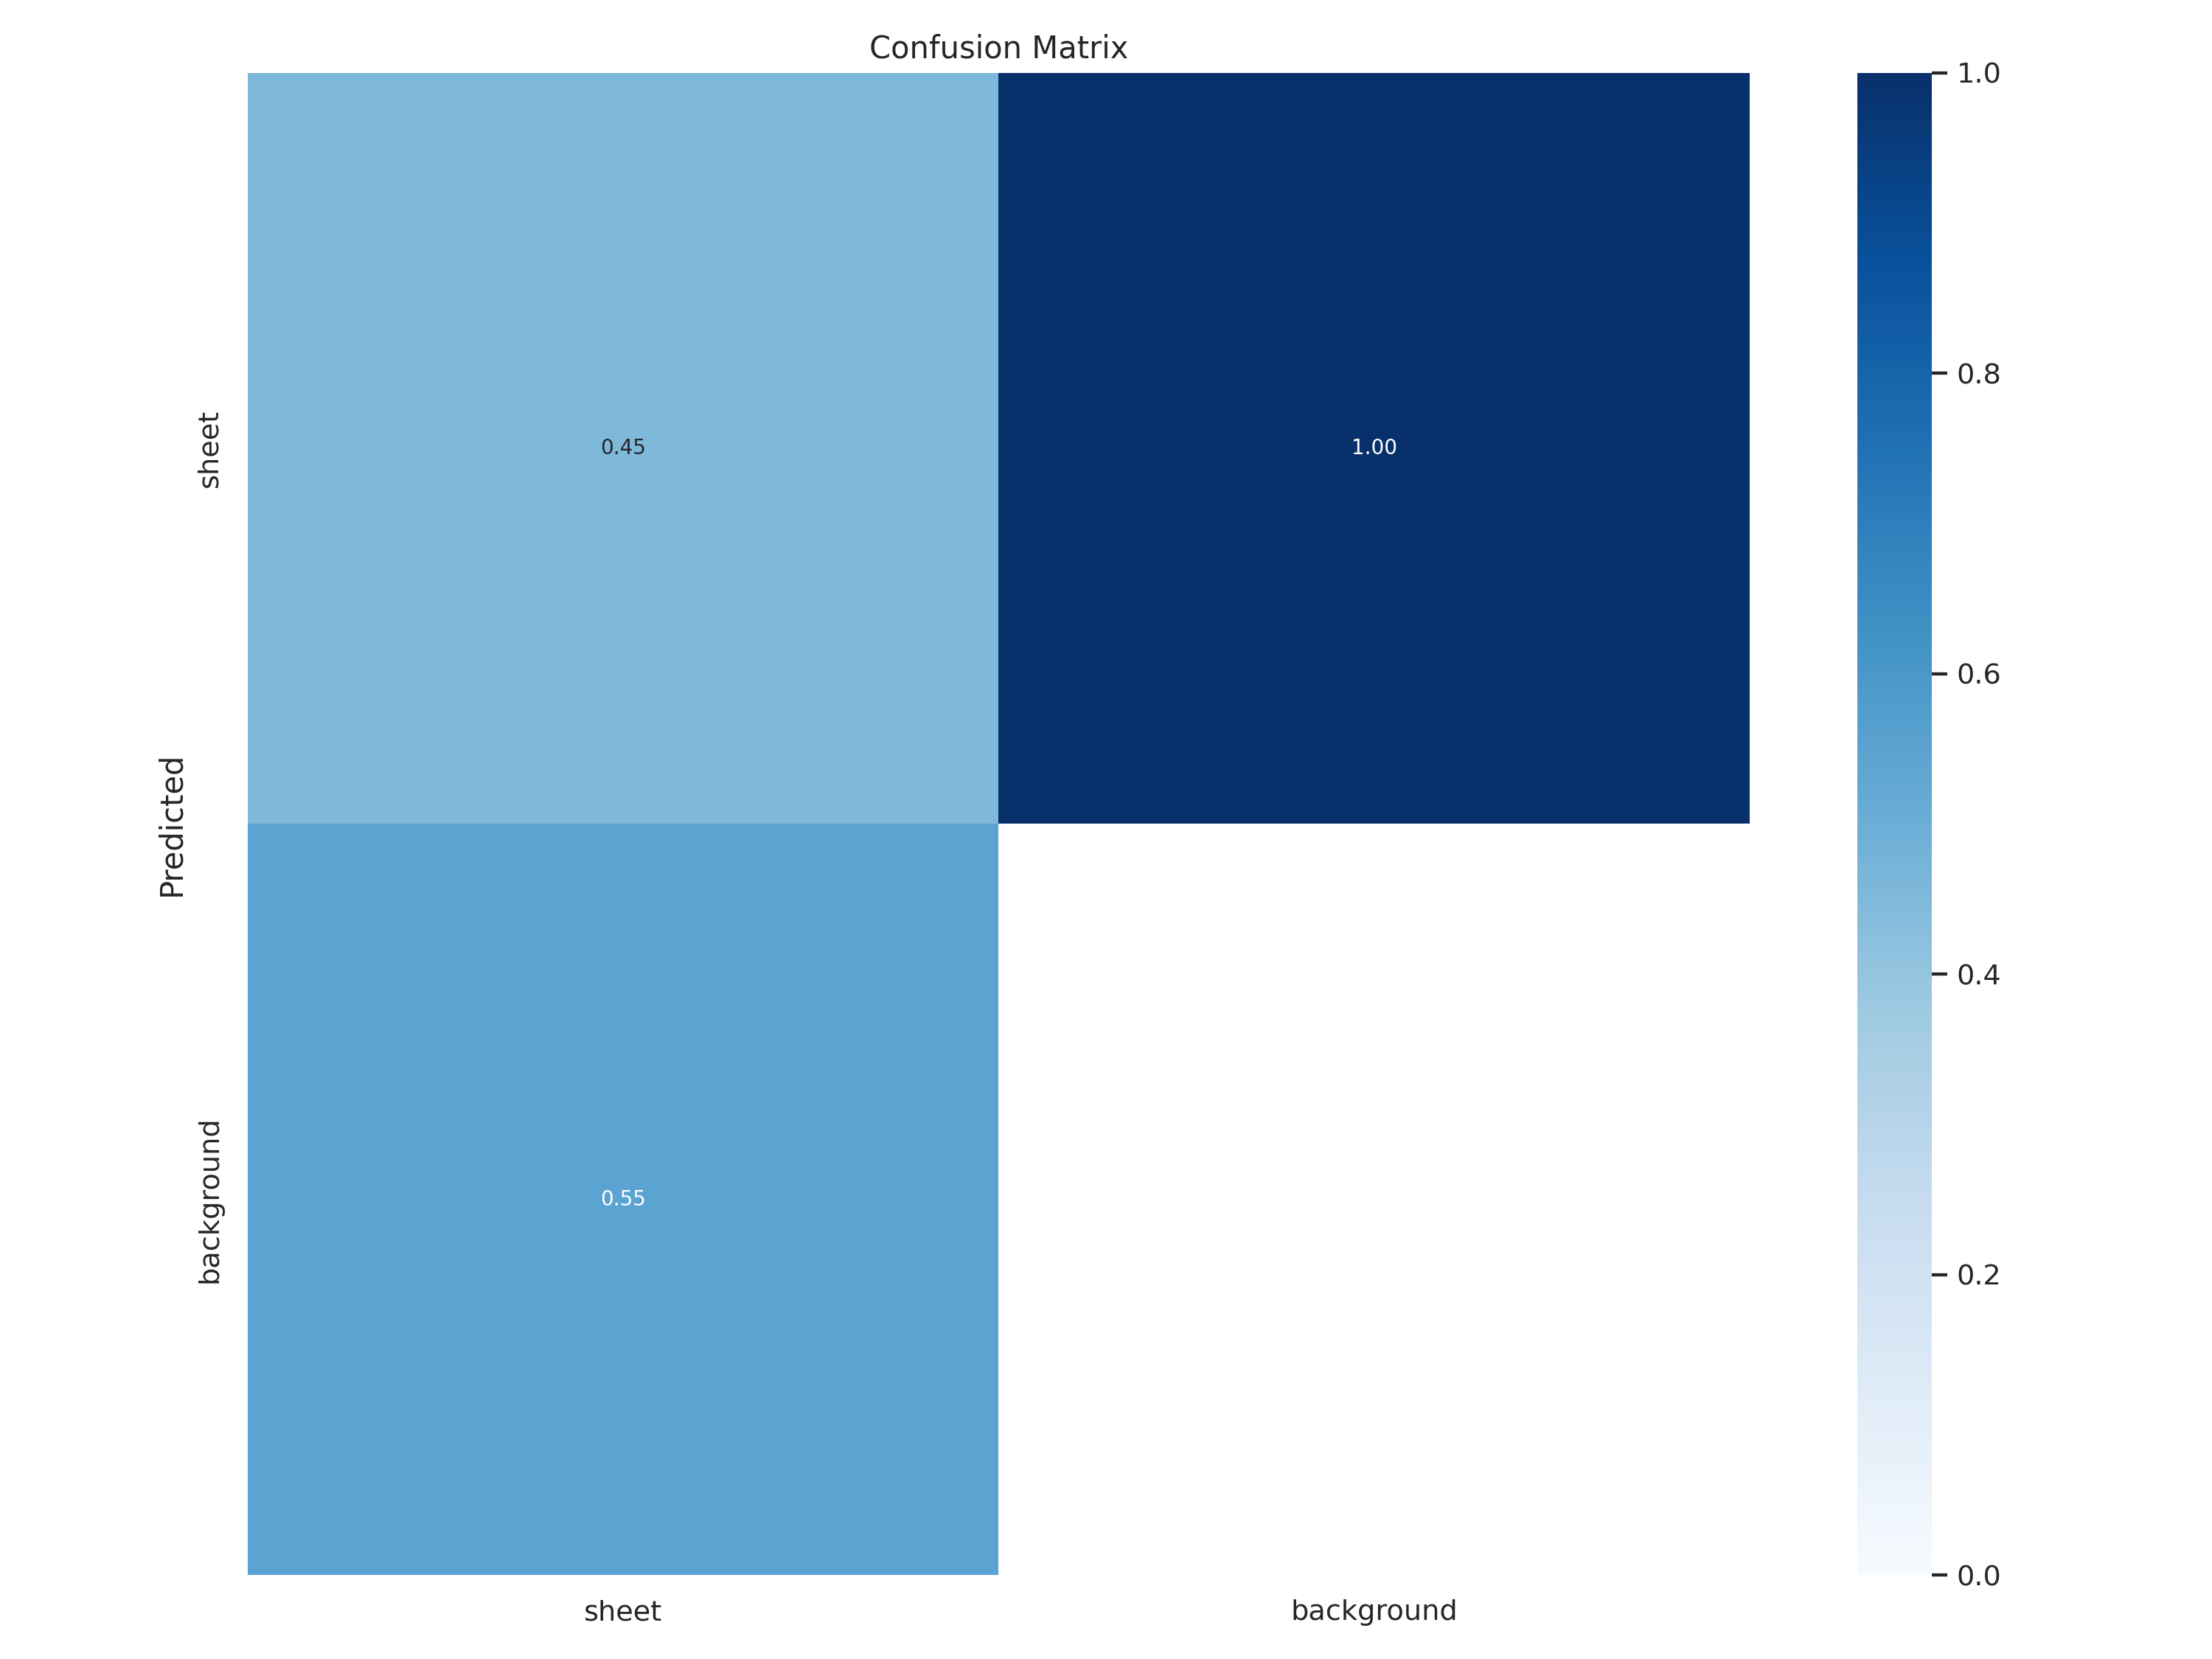

In [29]:
Image(filename = '/content/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train5/confusion_matrix.png')

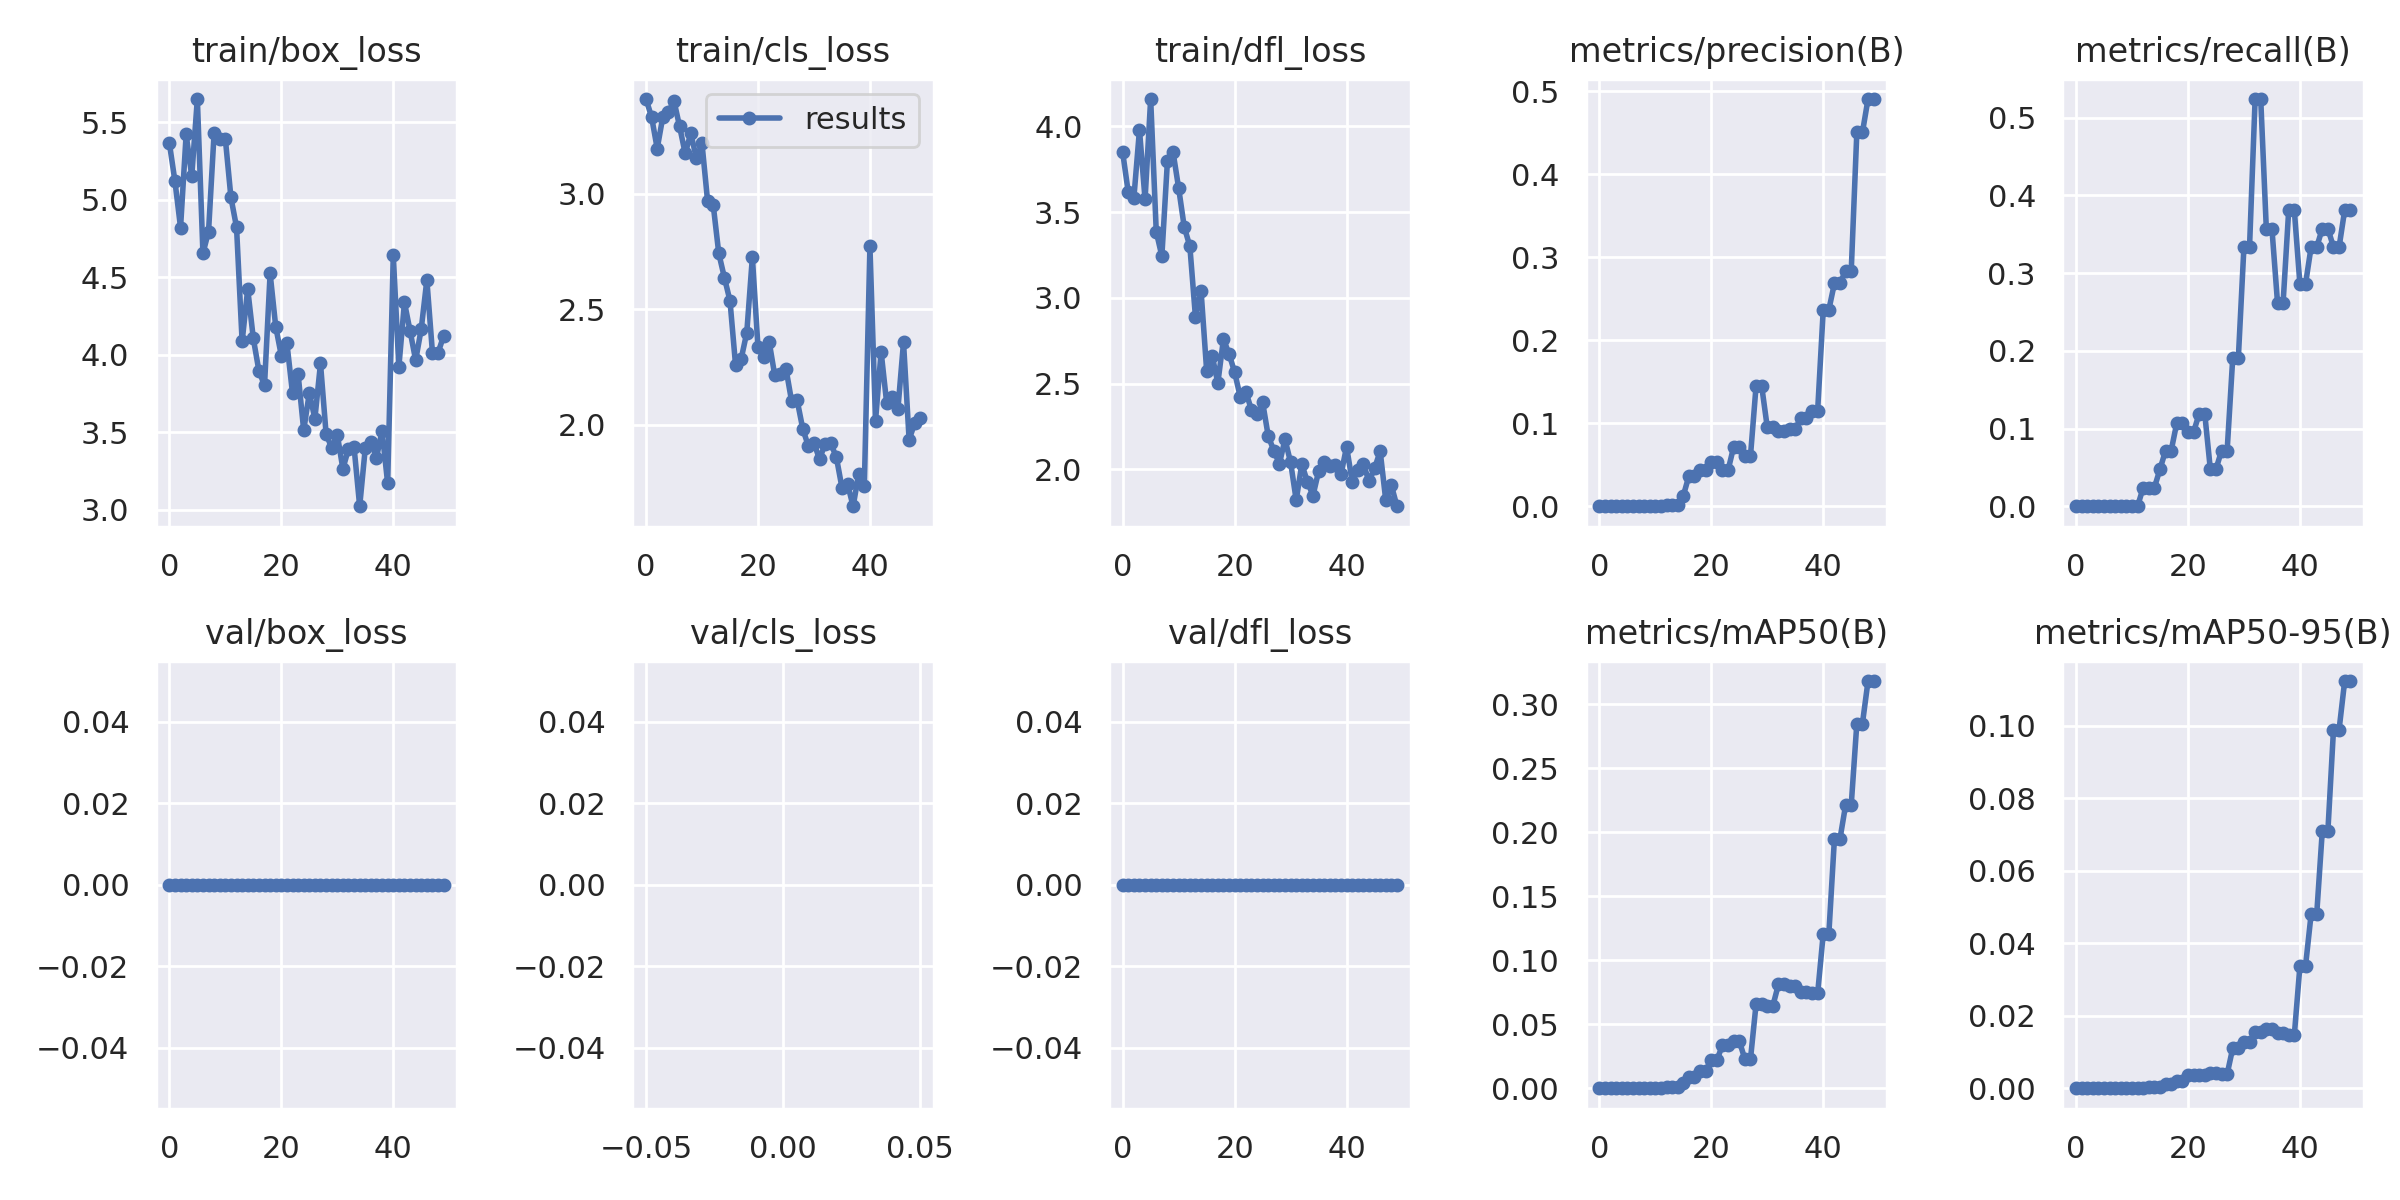

In [30]:
Image(filename = r'/content/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train5/results.png', width = 600)

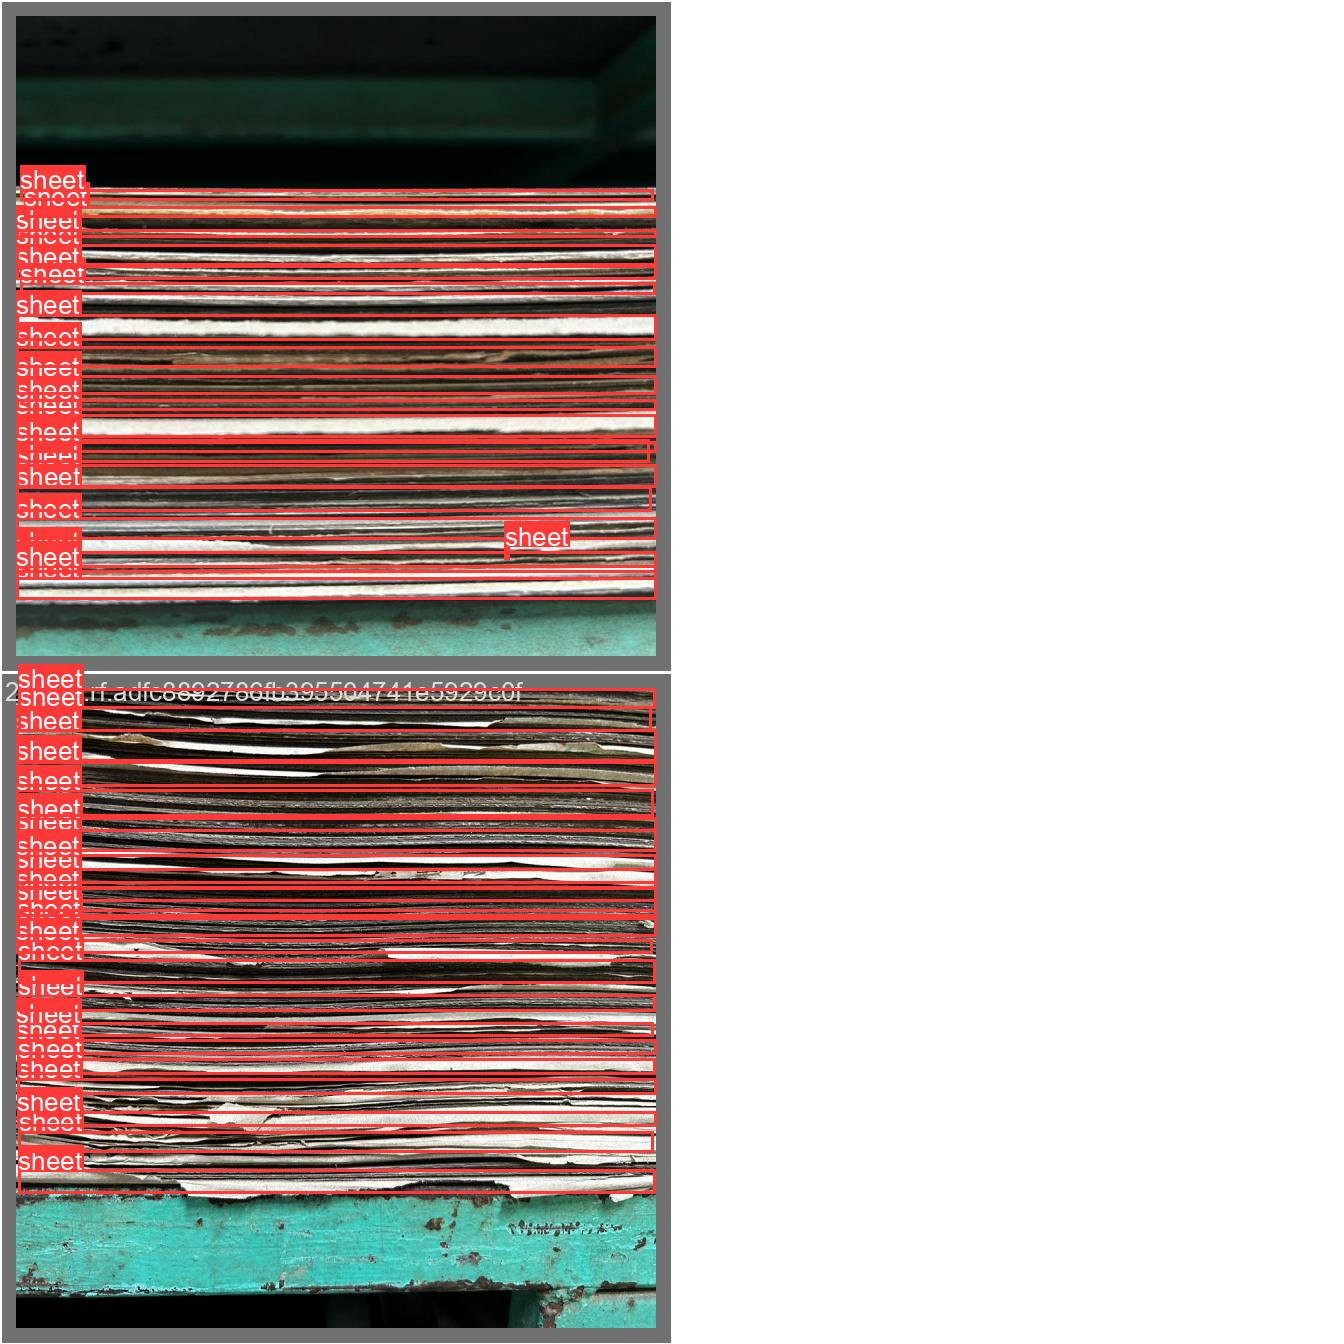

In [31]:
Image(filename = r'/content/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train5/val_batch0_labels.jpg', width =600)


In [32]:
!pwd

/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect


In [33]:
!python val.py model='/content/drive/MyDrive/detection_tracking/comp_project/best.pt' data=/content/drive/MyDrive/detection_tracking/comp_project/data.yaml

2024-08-03 15:19:37.709644: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-03 15:19:37.729562: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-03 15:19:37.735579: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-03 15:19:37.750114: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-03 15:19:39.051098: W tensorflow/compiler/tf2

In [ ]:
!grep -r "np.float" /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/deep_sort_pytorch/deep_sort/


/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/deep_sort_pytorch/deep_sort/deep/feature_extractor.py:            return cv2.resize(im.astype(np.float6432)/255., size)
/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/deep_sort_pytorch/deep_sort/sort - Copy/preprocessing.py:    boxes = boxes.astype(np.float64)
/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/deep_sort_pytorch/deep_sort/sort/detection.py:        self.tlwh = np.asarray(tlwh, dtype=np.float64)
/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/deep_sort_pytorch/deep_sort/sort/detection.py:        self.feature = np.asarray(feature, dtype=np.float6432)
/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/deep_sort_pytorch/deep_sort/sort/preprocessing.py:    boxes = boxes.astype(np.float64)


In [ ]:
!find /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/deep_sort_pytorch/deep_sort/ -type f -exec sed -i 's/np.float/np.float64/g' {} +


In [38]:
!python predict.py model='/content/drive/MyDrive/detection_tracking/comp_project/best.pt' source='/content/drive/MyDrive/detection_tracking/comp_project/SampleVideo.mp4'

[2024-08-03 15:36:46,794][root.tracker][INFO] - Loading weights from deep_sort_pytorch/deep_sort/deep/checkpoint/ckpt.t7... Done!
2024-08-03 15:36:47.108707: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-03 15:36:47.125625: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-03 15:36:47.131420: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-03 15:36:47.145852: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, 

**Import ultralytics**

In [45]:
%pip install ultralytics


In [47]:
import sys
print("Python version:", sys.version)
print("Python paths:", sys.path)


Python version: 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
Python paths: ['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/usr/local/lib/python3.10/dist-packages/setuptools/_vendor', '/root/.ipython']


In [48]:
# Uninstall ultralytics
!pip uninstall ultralytics -y

# Install ultralytics
!pip install ultralytics


Found existing installation: ultralytics 8.0.3
Uninstalling ultralytics-8.0.3:
  Successfully uninstalled ultralytics-8.0.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 863.7/863.7 kB 23.4 MB/s eta 0:00:00


In [49]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.71 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 34.3/78.2 GB disk)


**Sheet counting using trained model best.pt using sample video**

In [51]:
import cv2
from ultralytics import YOLO, solutions

# Load the pre-trained YOLOv8 model
model = YOLO("/content/drive/MyDrive/detection_tracking/comp_project/best.pt")

# Open the video file
cap = cv2.VideoCapture("/content/drive/MyDrive/detection_tracking/comp_project/SampleVideo.mp4")
assert cap.isOpened(), "Error reading video file"

# Get video properties: width, height, and frames per second (fps)
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))

# Define points for a line or region of interest in the video frame
line_points = [(20, 400), (1080, 400)]  # Line coordinates

# Define the class names (assuming 'sheet' is the only class in your model)
class_names = ["sheet"]

# Specify classes to count, for example: sheet (0)
classes_to_count = [0]  # Class ID for sheet

# Initialize the video writer to save the output video
video_writer = cv2.VideoWriter("object_counting_output.avi", cv2.VideoWriter_fourcc(*"mp4v"), fps, (w, h))

# Initialize the Object Counter with visualization options and other parameters
counter = solutions.ObjectCounter(
    names=class_names,  # Class names list
    view_img=True,  # Display the image during processing
    reg_pts=line_points,  # Region of interest points
    draw_tracks=True,  # Draw tracking lines for objects
    line_thickness=2,  # Thickness of the lines drawn
)

# Process video frames in a loop
while cap.isOpened():
    success, im0 = cap.read()
    if not success:
        print("Video frame is empty or video processing has been successfully completed.")
        break

    # Perform object tracking on the current frame, filtering by specified classes
    tracks = model.track(im0, persist=True, show=False, classes=classes_to_count)

    # Use the Object Counter to count objects in the frame and get the annotated image
    im0 = counter.start_counting(im0, tracks)

    # Write the annotated frame to the output video
    video_writer.write(im0)

# Release the video capture and writer objects
cap.release()
video_writer.release()

# Close all OpenCV windows
cv2.destroyAllWindows()

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Line Counter Initiated.
requirements: Ultralytics requirement ['lapx>=0.5.2'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 37.4 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 3.6s, installed 1 package: ['lapx>=0.5.2']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


0: 640x384 33 sheets, 109.6ms
Speed: 3.5ms preprocess, 109.6ms inference, 591.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 30 sheets, 39.5ms
Speed: 2.6ms preprocess, 39.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 29 sheets, 39.4ms
Speed: 2.7ms preprocess, 39.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 30 sheets, 39.4ms
Speed: 2.9ms preprocess, 39.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 30 sheets, 33.6ms
Speed: 2.3ms preprocess, 33.6ms infe